In [23]:
import pandas as pd
# CHANGE TO THE LOCATION OF YOUR CSV!
df = pd.read_csv("/home/austin/sample.csv", header=None)
df = df.set_axis(['tool', 'program_set', 'seed', 'campaign', 'violation', 'direct', 'config1', 'config2', 'partial_order','program'], axis='columns')
df

,tool,program_set,seed,campaign,violation,direct,config1,config2,partial_order,program
0,flowdroid,droidbench-small,NONE,campaign0,VIOLATION,DIRECT,9d2e230d5859daa359c57aeb0fd090a8,3c2c6c9d6e896c028463ca607b7fce7a,analyzeframeworks/TRUE/MST/FALSE,ActivityLifecycle1.apk.json
1,flowdroid,droidbench-small,NONE,campaign0,VIOLATION,DIRECT,4f9b34cf1904a0ff769463243bdcfe18,3c2c6c9d6e896c028463ca607b7fce7a,codeelimination/REMOVECODE/MST/DEFAULT,ActivityLifecycle1.apk.json
2,flowdroid,fossdroid,NONE,campaign0,VIOLATION,DIRECT,8f0cf1475ff0a90d31e8c21a00731724,3c2c6c9d6e896c028463ca607b7fce7a,aliasflowins/TRUE/MPT/FALSE,com.angrydoughnuts.android.alarmclock_15-relea...


## Summary of Results

In [24]:
transform = df.replace({
    "cats-microbenchmark":"microbenchmark",
    "fossdroid":"real_world",
    "droidbench":"microbenchmark",
    "dacapo-2006":"real_world",
    "droidbench-small":"microbenchmark",
    "cats-small": "microbenchmark",
    "dacapo-small": "real-world"})
pvt = pd.pivot_table(transform, index='program_set', values='partial_order', columns=['tool'], aggfunc=lambda x: len(x.unique()), margins=True)
pvt

tool,flowdroid,All
program_set,,
microbenchmark,2,2
real-world,1,1
All,3,3


## Only Base Configuration Testing Results

In [25]:
pvt = pd.pivot_table(transform[transform.seed == 'NONE'], index='program_set', values='partial_order', columns=['tool'],
                     aggfunc=lambda x: len(x.unique()), margins=True)
pvt

tool,flowdroid,All
program_set,,
microbenchmark,2,2
real-world,1,1
All,3,3


## Figure 6

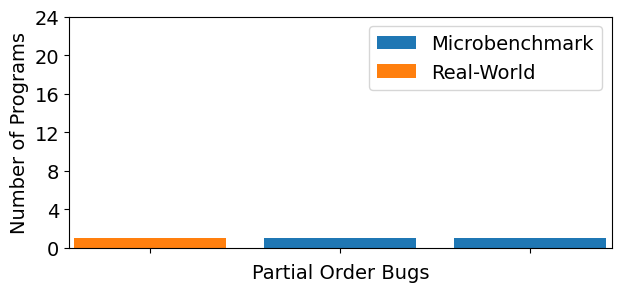

In [31]:
import matplotlib.pyplot as plt
plt.close("all")

plt.rc("font", size=14)

fig, ax = plt.subplots(figsize=(7,3))

to_plot = df[["partial_order","program_set"]]
to_plot = to_plot.replace({
    "cats-microbenchmark":"microbenchmark",
    "fossdroid":"real_world",
    "droidbench":"microbenchmark",
    "dacapo-2006":"real_world",
    "droidbench-small":"microbenchmark",
    "cats-small": "microbenchmark",
    "dacapo-small": "real-world"})
pvt = to_plot.pivot_table(index="partial_order", columns="program_set", values="partial_order", aggfunc=lambda x: len(x)).fillna(0)
pvt['total'] = pvt.microbenchmark + pvt.real_world
pvt = pvt.sort_values('total')
pvt

ax.bar(pvt.index, pvt.microbenchmark, label="Microbenchmark")
ax.bar(pvt.index, pvt.real_world, bottom=pvt.microbenchmark, label="Real-World")

ax.set_xticklabels("")
ax.set_yticks(range(0, 28, 4))
ax.set_xlabel("Partial Order Bugs")
ax.set_ylabel("Number of Programs")
ax.legend()
plt.margins(x=0.01)
plt.show()